As of the latest reliable data:

> 🌍 **Google processes over 8.5 billion searches per day** (as of 2024).

That means:

* 📈 **\~99,000 searches per second**
* 🕐 **\~5.9 million searches per minute**
* 📅 **\~255 million searches per hour**

---

### ✅ Additional Insights:

| Metric                    | Estimate                                    |
| ------------------------- | ------------------------------------------- |
| **Daily Searches**        | 8.5+ billion                                |
| **Monthly Searches**      | \~255+ billion                              |
| **Yearly Searches**       | \~3.1 trillion                              |
| **Search Share (Global)** | \~92% of all search engine traffic          |
| **Top Search Categories** | News, how-to guides, health, shopping, tech |

---

### 💡 What Contributes to This Massive Volume?

* **Mobile devices**: The majority of searches now come from smartphones.
* **Voice search**: Through Google Assistant and smart devices.
* **YouTube & Google Maps**: Integrated Google services generate more search traffic.
* **AI-powered queries**: Search suggestions, personalized search results, etc.

---



# Qestions we will have to derive with this project
- First, write a code wehre, by changing just the keyword, we can search for multiple things.
- Top 15 countries where the keywords are searched the most, and also create visual representation
- A world map need to be plotted showing the countries that search the keyword the most.
- We need toextract the time-wisse interest of the keyworkd - how it trended in different years.
- Compare related keywords and plot the graph.

In [3]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


# setup pytrend library and keyword define

# hl = "host language" — it specifies the language interface of the Google Trends site you're accessing.
# It controls the language of the results returned by Google Trends.

For example:

"en-US" → English (United States)

"hi-IN" → Hindi (India)

"fr-FR" → French (France)

In [60]:
pytrends = TrendReq(hl = 'en-US', tz = 360)            #tz = time zone , 360 which is good for the india
keyword = "cloud computing"            # to search as per you choice so for now taken cloud computing as a keyword

# Data Request

# cat means category and = 0 means you want in all category
# geo means geography (in which you want to know about the trend) and = '' means you want trend globally
# In Pytrends, the parameter gprop stands for:

gprop = "Google property"
It specifies which type of Google service you want to retrieve search trend data from.
| `gprop` Value  | Meaning                          |
| -------------- | -------------------------------- |
| `''` *(empty)* | Default: **Google Web Search**   |
| `'images'`     | Google Image Search              |
| `'news'`       | Google News Search               |
| `'youtube'`    | YouTube Search                   |
| `'froogle'`    | Google Shopping (Product Search) |


In [30]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo = '', gprop = '')

# country wise interest 

In [43]:
region_data = pytrends.interest_by_region() 
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)           #we want decending data so if we use ascending = false means that will come in decending way

C:\Users\deemi\AppData\Local\Temp\ipykernel_22184\2011298988.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




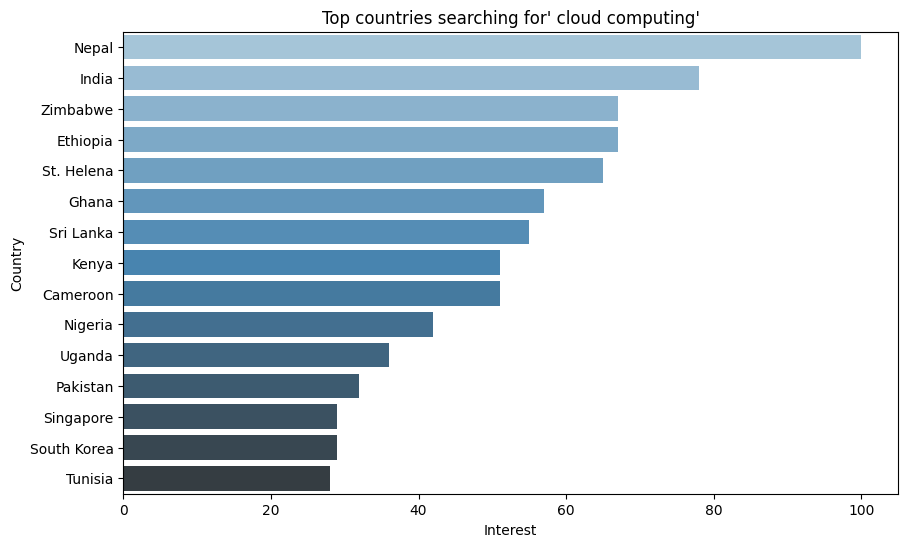

In [47]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Blues_d")
plt.title(f"Top countries searching for' {keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map

In [ ]:
# px.choropleth is useful to build worldmap

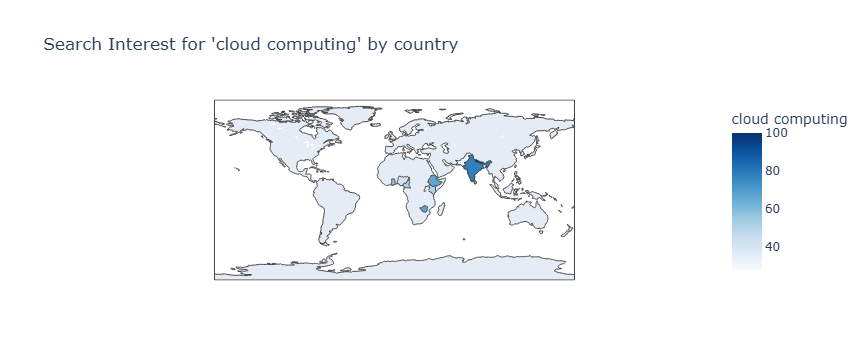

In [48]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for '{keyword}' by country",
                    color_continuous_scale='Blues')
fig.show()

# Time wise interest

In [50]:
time_df = pytrends.interest_over_time()

C:\Users\deemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

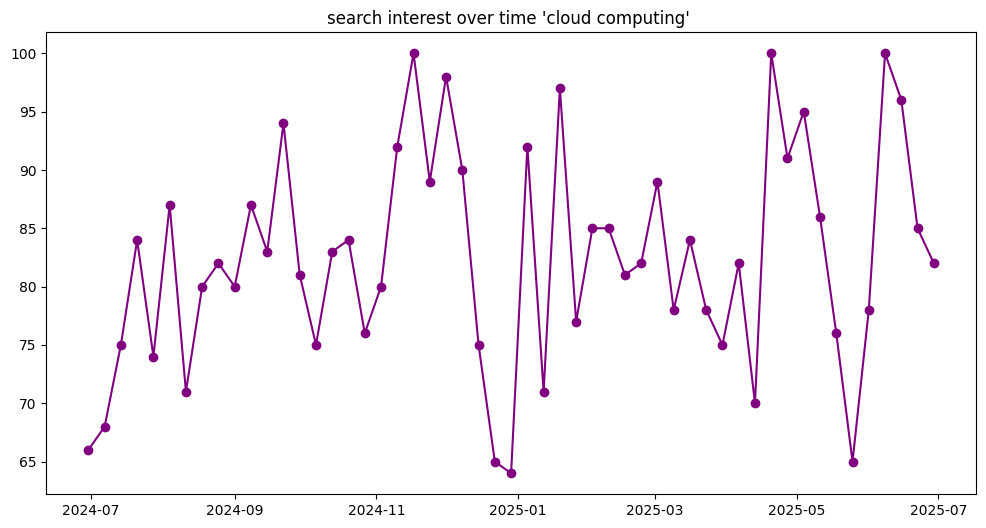

In [53]:
plt.figure(figsize = (12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = 'purple')
plt.title(f"search interest over time '{keyword}' ")
plt.xlable("date")
plt.ylable("Interest")
plt.grid(True)
plt.show()

# Multiple keywords compare

In [56]:
kw_list = ["cloud computing", "data science", "machine learning"]      # creating list to call
pytrends.build_payload(kw_list, cat = 0, timeframe = 'today 12-m', geo = '', gprop = '')

C:\Users\deemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

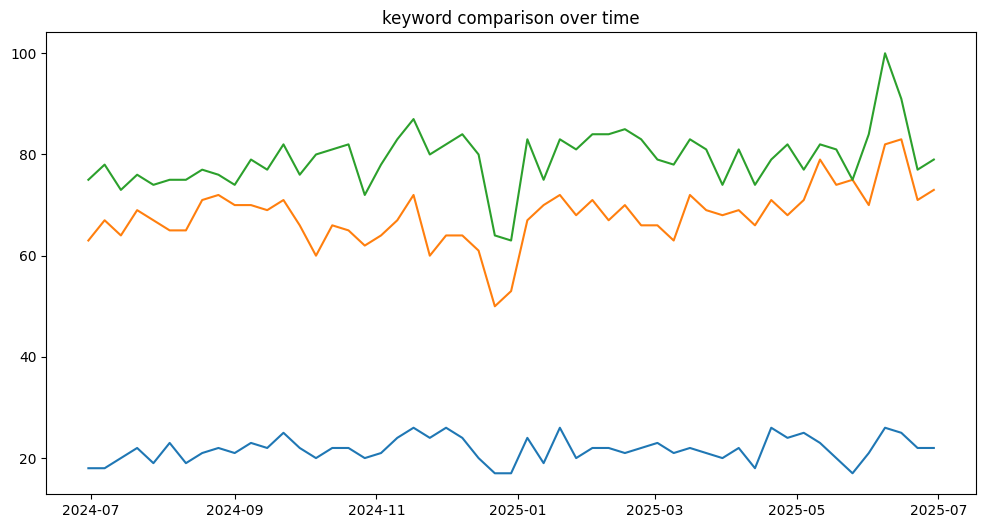

In [59]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:                          #for loop creation
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("keyword comparison over time")
plt.xlable("Date")
plt.ylable("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Key Features:

📡 Pulled real-time search trends via PyTrends (Google Trends API)

🌍 Mapped global interest using Plotly Choropleth maps

📊 Created insightful trendline, heatmap, and bar charts

🧠 Performed keyword comparisons across countries & platforms

🛠️ Tools used: Python, Pandas, Seaborn, Matplotlib, Plotly, PyTrends

# Insights Uncovered:

- How public interest in topics shifts geographically and over time

- Which countries are most curious about a given keyword

- How different Google platforms (Web, YouTube, News) show different engagement patterns



# Thank You
# Deepak Mishra